<a href="https://colab.research.google.com/github/asmaamuhamed20/water-segmentation/blob/main/water_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os

image_dir = '/content/drive/MyDrive/satellite_water_seg/images'
mask_dir = '/content/drive/MyDrive/satellite_water_seg/labels'

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.tif')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

print(f"number of images {len(image_files)}")
print(f"number of labels {len(mask_files)}")

number of images 306
number of labels 456


In [11]:
valid_image_paths = []
valid_mask_paths = []

for img in image_files:
    img_name = os.path.splitext(img)[0]
    mask_name = img_name + '.png'
    if mask_name in mask_files:
        valid_image_paths.append(os.path.join(image_dir, img))
        valid_mask_paths.append(os.path.join(mask_dir, mask_name))

print(f"valid pairs: {len(valid_image_paths)}")

valid pairs: 306


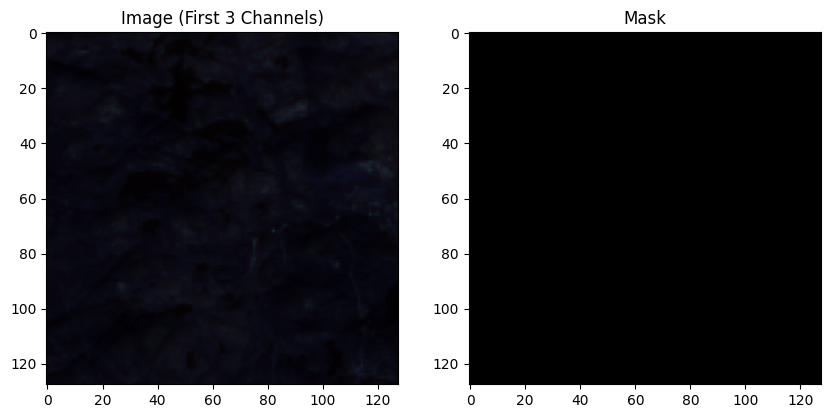

In [12]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_tif_image(path):
    image = tifffile.imread(path).astype(np.float32)
    image = np.clip(image, 0, 10000)
    image = (image - image.min()) / (image.max() - image.min() + 1e-6)
    return image


def load_mask(path):
    return np.array(Image.open(path).convert('L')) // 255

def visualize_sample(image_path, mask_path):
    image = load_tif_image(image_path)
    mask = load_mask(mask_path)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(image[:, :, :3])
    axs[0].set_title('Image (First 3 Channels)')

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')

    plt.show()
visualize_sample(valid_image_paths[0], valid_mask_paths[0])

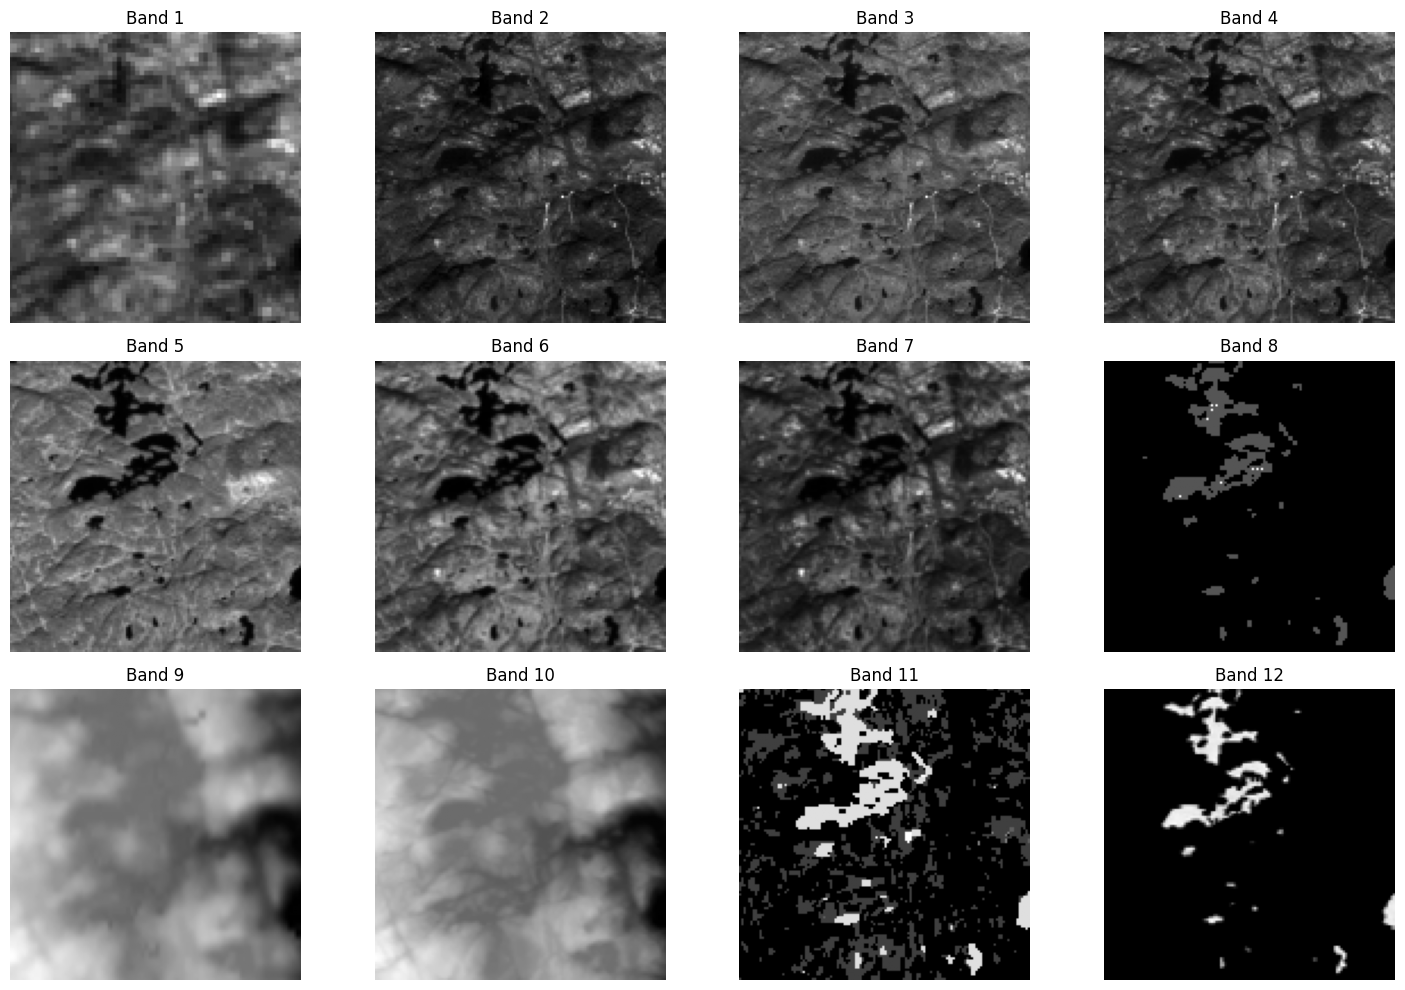

In [13]:
def visualize_all_bands(image_path):
    image = load_tif_image(image_path)
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))
    axs = axs.flatten()

    for i in range(12):
        axs[i].imshow(image[:, :, i], cmap='gray')
        axs[i].set_title(f'Band {i+1}')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_all_bands(valid_image_paths[0])

In [17]:
import cv2

def is_blurry(image, threshold=10):
    variances = []
    for i in range(image.shape[2]):
        band = image[:, :, i]
        band_uint8 = (band * 255).astype(np.uint8)
        laplacian_var = cv2.Laplacian(band_uint8, cv2.CV_64F).var()
        variances.append(laplacian_var)

    mean_var = np.mean(variances)
    return mean_var < threshold, mean_var


In [18]:
filtered_image_paths = []
filtered_mask_paths = []

for img_path, mask_path in zip(valid_image_paths, valid_mask_paths):
    image = load_tif_image(img_path)
    blurry, score = is_blurry(image)
    if not blurry:
        filtered_image_paths.append(img_path)
        filtered_mask_paths.append(mask_path)
    else:
        print(f" Blurry image skipped: {os.path.basename(img_path)} | Score: {score:.2f}")

print(f"number of filtered images {len(filtered_image_paths)}")


 Blurry image skipped: 300.tif | Score: 8.32
number of filtered images 305


In [19]:
def is_mask_valid(mask_path):
    mask = load_mask(mask_path)
    return np.any(mask)

def load_mask(mask_path):
    mask = Image.open(mask_path).convert("L")
    mask = np.array(mask)

    if mask.max() > 1:
        mask = (mask > 0).astype(np.uint8)

    return mask



final_image_paths = []
final_mask_paths = []

for img_path, mask_path in zip(filtered_image_paths, filtered_mask_paths):
    if is_mask_valid(mask_path):
        final_image_paths.append(img_path)
        final_mask_paths.append(mask_path)
    else:
        print(f"Mask is empty: {os.path.basename(mask_path)}")

print(f"number of valid masks  {len(final_image_paths)}")


Mask is empty: 103.png
Mask is empty: 106.png
Mask is empty: 107.png
Mask is empty: 115.png
Mask is empty: 122.png
Mask is empty: 136.png
Mask is empty: 14.png
Mask is empty: 151.png
Mask is empty: 152.png
Mask is empty: 155.png
Mask is empty: 163.png
Mask is empty: 167.png
Mask is empty: 173.png
Mask is empty: 188.png
Mask is empty: 189.png
Mask is empty: 204.png
Mask is empty: 207.png
Mask is empty: 21.png
Mask is empty: 211.png
Mask is empty: 227.png
Mask is empty: 232.png
Mask is empty: 258.png
Mask is empty: 266.png
Mask is empty: 273.png
Mask is empty: 280.png
Mask is empty: 289.png
Mask is empty: 292.png
Mask is empty: 296.png
Mask is empty: 299.png
Mask is empty: 302.png
Mask is empty: 304.png
Mask is empty: 31.png
Mask is empty: 37.png
Mask is empty: 38.png
Mask is empty: 41.png
Mask is empty: 47.png
Mask is empty: 5.png
Mask is empty: 58.png
Mask is empty: 70.png
Mask is empty: 75.png
Mask is empty: 80.png
Mask is empty: 82.png
Mask is empty: 88.png
Mask is empty: 90.png
Mask

In [20]:
final_image_paths
final_mask_paths


['/content/drive/MyDrive/satellite_water_seg/labels/0.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/1.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/10.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/100.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/101.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/102.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/104.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/105.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/108.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/109.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/11.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/110.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/111.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/112.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/113.png',
 '/content/drive/MyDrive/satellite_water_seg/labels/114.png',
 '/content/dri

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

In [22]:
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths):
        self.image_paths = image_paths
        self.mask_paths = mask_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = load_tif_image(self.image_paths[idx])
        image = np.transpose(image, (2, 0, 1))  # to [12, H, W]
        image = torch.tensor(image, dtype=torch.float32)

        mask = load_mask(self.mask_paths[idx])
        mask = torch.tensor(mask, dtype=torch.float32).unsqueeze(0)  # [1,H,W]

        return image, mask


In [56]:
from sklearn.model_selection import train_test_split


train_images, val_test_images, train_masks, val_test_masks = train_test_split(
    final_image_paths, final_mask_paths, test_size=0.3, random_state=42
)


val_images, test_images, val_masks, test_masks = train_test_split(
    val_test_images, val_test_masks, test_size=0.5, random_state=42
)


In [57]:
train_dataset = SegmentationDataset(train_images, train_masks)
val_dataset = SegmentationDataset(val_images, val_masks)
test_dataset = SegmentationDataset(test_images, test_masks)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [58]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_batch(loader):
    batch = next(iter(loader))
    images, masks = batch  # images shape: [B, C, H, W], masks shape: [B, 1, H, W]

    batch_size = images.shape[0]
    n = min(4, batch_size)

    plt.figure(figsize=(12, 6))

    for i in range(n):

        img = images[i].permute(1, 2, 0).cpu().numpy()

        if img.shape[2] > 3:
            img = img[:, :, :3]

        img = np.clip(img, 0, 1)

        mask = masks[i][0].cpu().numpy()

        plt.subplot(2, n, i + 1)
        plt.imshow(img)
        plt.title(f'Image {i+1}')
        plt.axis('off')

        plt.subplot(2, n, i + 1 + n)
        plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
        plt.title(f'Mask {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


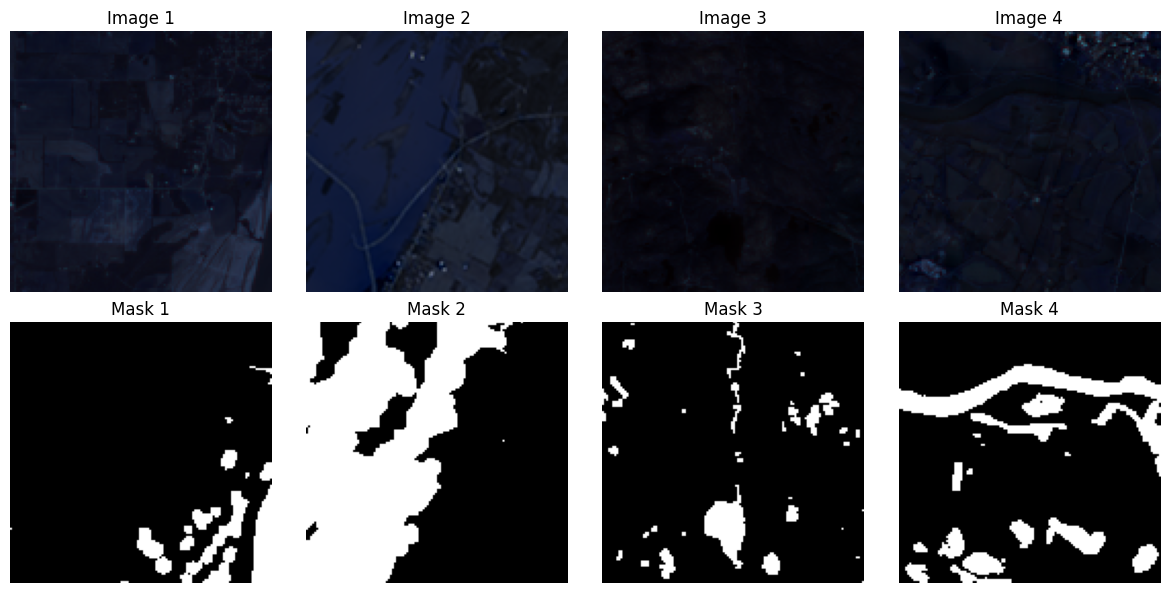

In [29]:
visualize_batch(train_loader)

In [25]:
!pip install segmentation-models-pytorch --quiet

In [40]:
!pip install tqdm

In [59]:
import torch
from segmentation_models_pytorch import Unet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Unet(
    encoder_name="efficientnet-b0",
    encoder_weights="imagenet",
    in_channels=12,
    classes=1
)

model.to(device)


Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      12, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identi

In [60]:
def iou_score(preds, targets, threshold=0.5):
    preds = (preds > threshold).float()
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum() - intersection
    if union == 0:
        return torch.tensor(1.0)
    return intersection / union

def accuracy_score(preds, targets, threshold=0.5):
    preds = torch.sigmoid(preds)
    preds = (preds > threshold).float()
    correct = (preds == targets).float().sum()
    total = torch.numel(preds)
    return (correct / total).item()

In [61]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for images, masks in loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    return running_loss / len(loader.dataset)

In [62]:
def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0
    val_iou = 0
    val_acc = 0

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)

            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)

            preds = torch.sigmoid(outputs)
            iou = iou_score(preds, masks)
            acc = ((preds > 0.5) == masks).float().mean()

            val_iou += iou.item() * images.size(0)
            val_acc += acc.item() * images.size(0)

    total = len(loader.dataset)
    avg_loss = val_loss / total
    avg_iou = val_iou / total
    avg_acc = val_acc / total

    return avg_loss, avg_iou, avg_acc


In [63]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy With Logits , combination of sigmoid and Binary Cross Entropy loss

optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [65]:
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_iou, val_acc = evaluate(model, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val IoU: {val_iou:.4f} | Val Acc: {val_acc:.4f}")


Epoch 1/50 | Train Loss: 0.2483 | Val Loss: 0.2377 | Val IoU: 0.4373 | Val Acc: 0.9219
Epoch 2/50 | Train Loss: 0.2246 | Val Loss: 0.2019 | Val IoU: 0.4262 | Val Acc: 0.9323
Epoch 3/50 | Train Loss: 0.2291 | Val Loss: 0.2077 | Val IoU: 0.4517 | Val Acc: 0.9323
Epoch 4/50 | Train Loss: 0.2156 | Val Loss: 0.1951 | Val IoU: 0.4369 | Val Acc: 0.9325
Epoch 5/50 | Train Loss: 0.2083 | Val Loss: 0.1941 | Val IoU: 0.4857 | Val Acc: 0.9374
Epoch 6/50 | Train Loss: 0.1875 | Val Loss: 0.1661 | Val IoU: 0.4650 | Val Acc: 0.9399
Epoch 7/50 | Train Loss: 0.1983 | Val Loss: 0.1604 | Val IoU: 0.4841 | Val Acc: 0.9430
Epoch 8/50 | Train Loss: 0.1779 | Val Loss: 0.1601 | Val IoU: 0.4875 | Val Acc: 0.9414
Epoch 9/50 | Train Loss: 0.1807 | Val Loss: 0.1530 | Val IoU: 0.4933 | Val Acc: 0.9453
Epoch 10/50 | Train Loss: 0.1725 | Val Loss: 0.1549 | Val IoU: 0.5096 | Val Acc: 0.9452
Epoch 11/50 | Train Loss: 0.1588 | Val Loss: 0.1545 | Val IoU: 0.5082 | Val Acc: 0.9444
Epoch 12/50 | Train Loss: 0.1489 | Val Lo

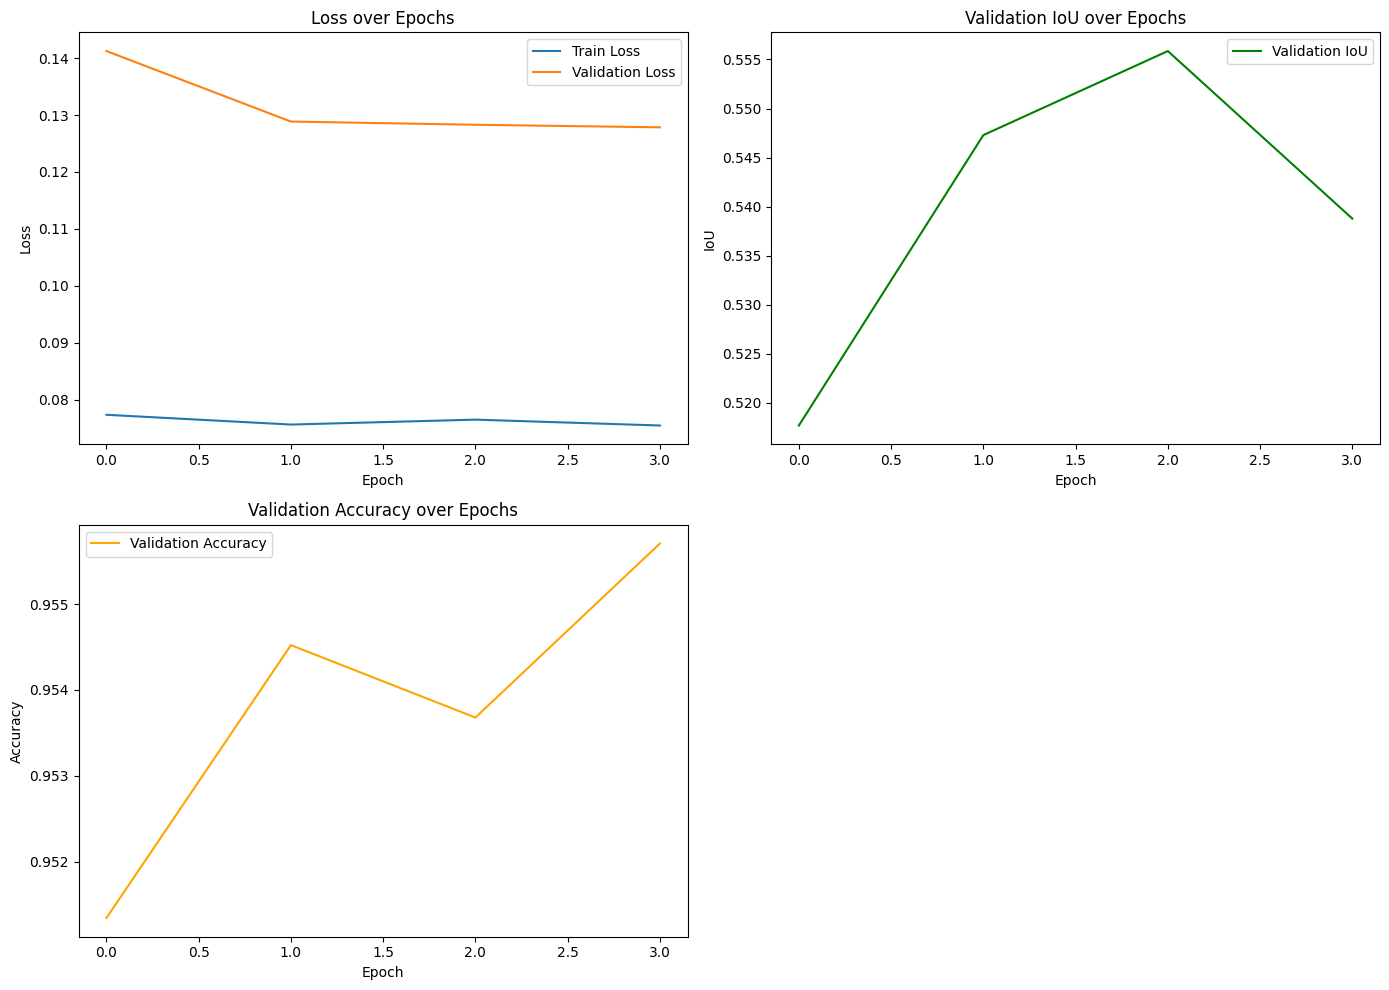

In [68]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(2, 2, 2)
plt.plot(val_ious, label='Validation IoU', color='green')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()
plt.title('Validation IoU over Epochs')

plt.subplot(2, 2, 3)
plt.plot(val_accs, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy over Epochs')

plt.tight_layout()
plt.show()


Test Loss: 0.2061, Test IoU: 0.6560, Test Acc: 0.9220


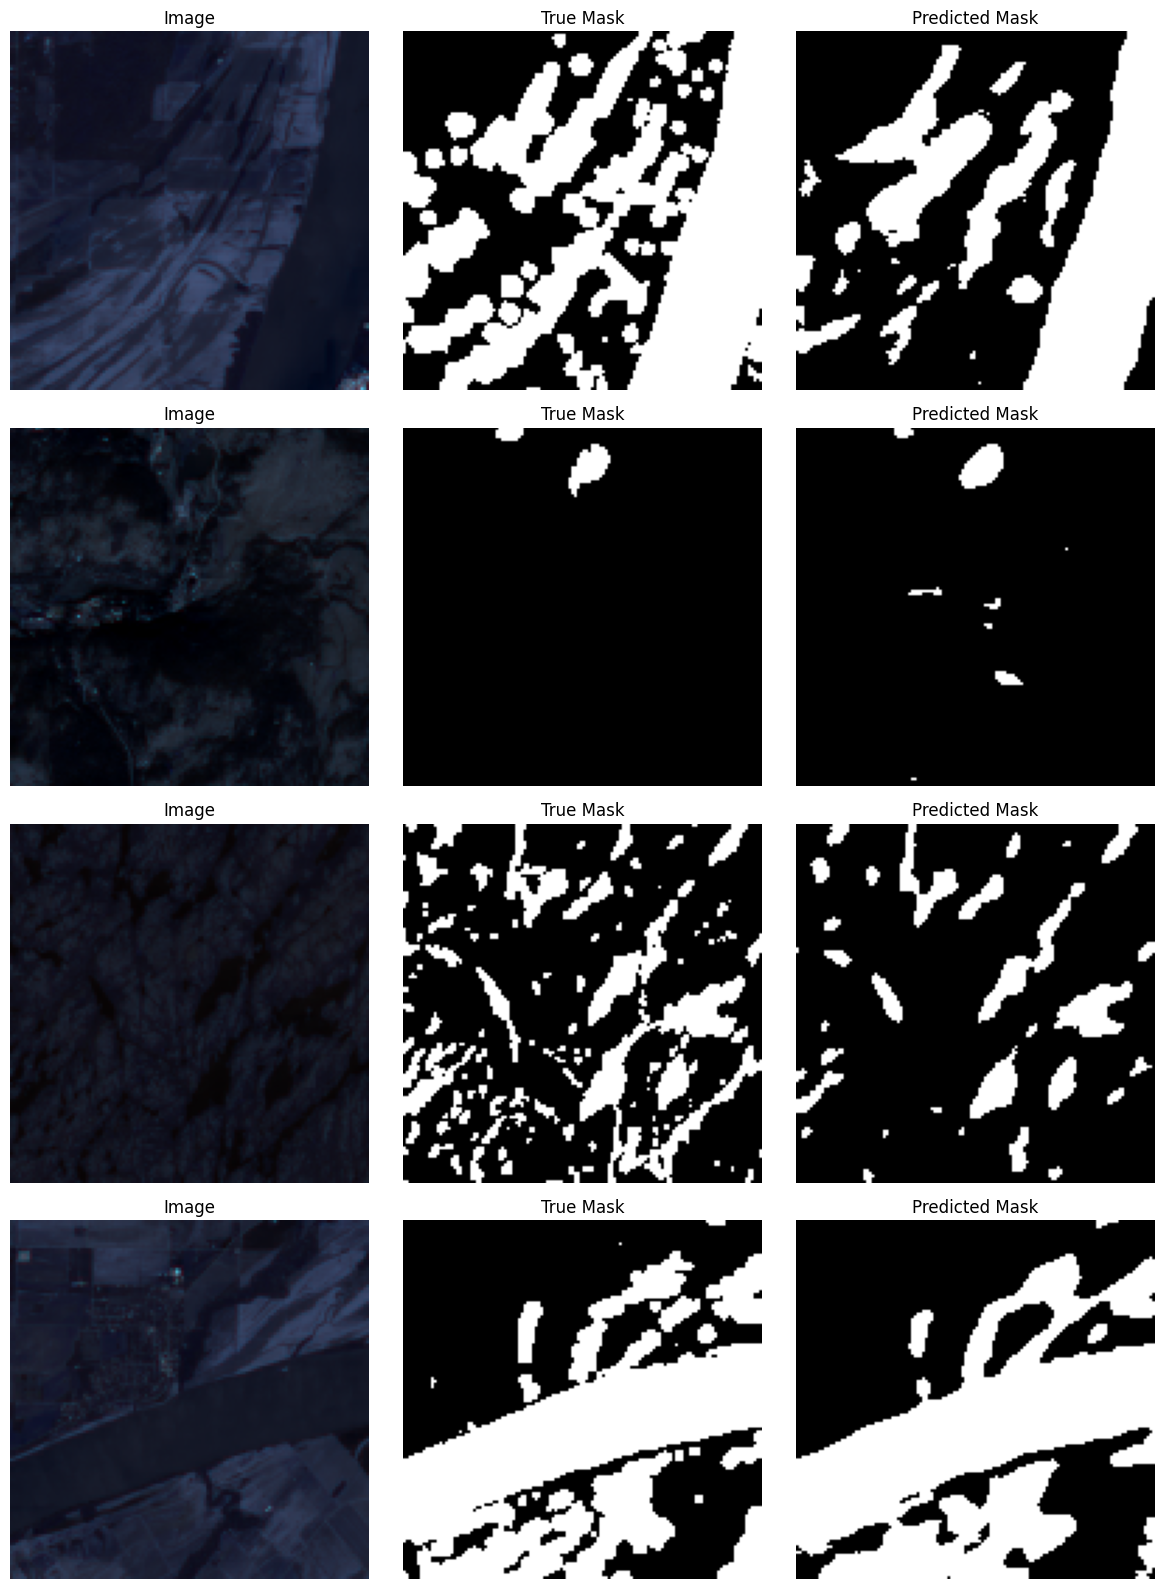

In [66]:
test_loss, test_iou, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test IoU: {test_iou:.4f}, Test Acc: {test_acc:.4f}")

visualize_predictions(model, test_loader, device, num=4)


## improvment

In [74]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from segmentation_models_pytorch import Unet

In [85]:
image_folder = '/content/drive/MyDrive/satellite_water_seg/images'
mask_folder = '/content/drive/MyDrive/satellite_water_seg/labels'

In [140]:
# Augmentation training
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=(0.0,) * 12, std=(1.0,) * 12),
    ToTensorV2(transpose_mask=True),
])
val_transform = A.Compose([
    A.Normalize(mean=(0.0,) * 12, std=(1.0,) * 12),
    ToTensorV2(transpose_mask=True),
])

test_transform = A.Compose([
    A.Normalize(mean=(0.0,) * 12, std=(1.0,) * 12),
    ToTensorV2(transpose_mask=True),
])

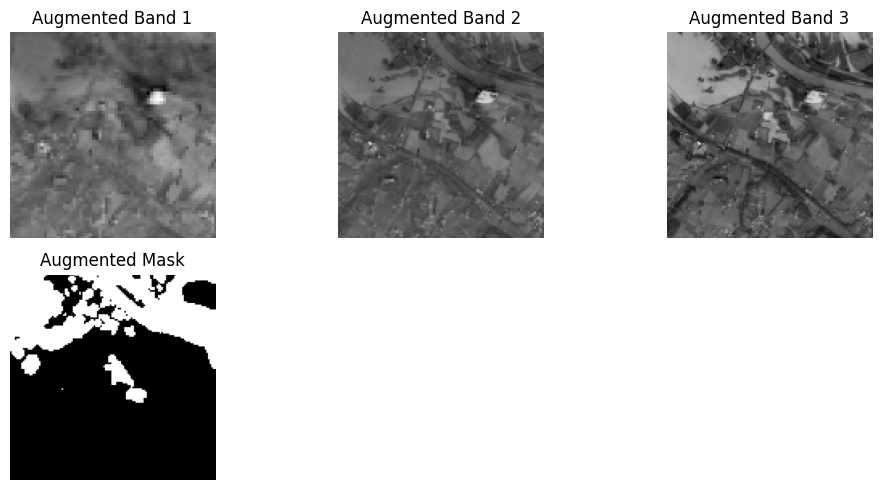

In [141]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, len(train_images) - 1)
image_path = train_images[idx]
mask_path = train_masks[idx]


image = tifffile.imread(image_path)  # (128, 128, 12)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # (128, 128)

augmented = train_transform(image=image, mask=mask)
aug_image = augmented["image"]  # (12, 128, 128)
aug_mask = augmented["mask"]    # (128, 128)


aug_image_np = aug_image.permute(1, 2, 0).cpu().numpy()  # (128, 128, 12)

plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(aug_image_np[:, :, i], cmap='gray')
    plt.title(f"Augmented Band {i+1}")
    plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(aug_mask, cmap='gray')
plt.title("Augmented Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


In [142]:
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = load_tif_image(self.image_paths[idx])  # [H, W, 12]
        mask = load_mask(self.mask_paths[idx])         # [H, W]

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask'].unsqueeze(0)
        else:
            image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
            mask = torch.tensor(mask, dtype=torch.float32).unsqueeze(0)

        return image, mask


In [143]:
train_dataset = SegmentationDataset(train_images, train_masks, transform=train_transform)
val_dataset   = SegmentationDataset(val_images, val_masks, transform=val_transform)
test_dataset  = SegmentationDataset(test_images, test_masks, transform=test_transform)

In [144]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [145]:
import torch
from segmentation_models_pytorch import Unet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Unet(
    encoder_name="efficientnet-b0",
    encoder_weights="imagenet",
    in_channels=12,
    classes=1,
)

for param in model.encoder.parameters():
    param.requires_grad = False


params = list(model.encoder.parameters())
for param in params[-20:]:
    param.requires_grad = True

model.to(device)


Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      12, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identi

In [150]:
def iou_metric(outputs: torch.Tensor, masks: torch.Tensor, threshold=0.5):
    outputs = torch.sigmoid(outputs)
    outputs = (outputs > threshold).float()
    intersection = (outputs * masks).sum(dim=(1,2,3))
    union = (outputs + masks).sum(dim=(1,2,3)) - intersection
    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou.mean().item()

def accuracy_metric(outputs: torch.Tensor, masks: torch.Tensor, threshold=0.5):
    outputs = torch.sigmoid(outputs)
    outputs = (outputs > threshold).float()
    correct = (outputs == masks).float().sum()
    total = torch.numel(outputs)
    return (correct / total).item()

def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0
    val_iou = 0
    val_acc = 0
    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)
            masks = masks.float()
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)
            val_iou += iou_metric(outputs, masks) * images.size(0)
            val_acc += accuracy_metric(outputs, masks) * images.size(0)
    val_loss /= len(loader.dataset)
    val_iou /= len(loader.dataset)
    val_acc /= len(loader.dataset)
    return val_loss, val_iou, val_acc

In [156]:
train_losses = []
val_losses = []
val_ious = []
val_accs = []
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        masks = masks.float()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)

    val_loss, val_iou, val_acc = validate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_ious.append(val_iou)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Val IoU: {val_iou:.4f} | "
          f"Val Acc: {val_acc:.4f}")


Epoch 1/30 | Train Loss: 0.2221 | Val Loss: 0.1973 | Val IoU: 0.4299 | Val Acc: 0.9203
Epoch 2/30 | Train Loss: 0.2153 | Val Loss: 0.1988 | Val IoU: 0.4308 | Val Acc: 0.9205
Epoch 3/30 | Train Loss: 0.2348 | Val Loss: 0.1959 | Val IoU: 0.4297 | Val Acc: 0.9210
Epoch 4/30 | Train Loss: 0.2257 | Val Loss: 0.1989 | Val IoU: 0.4297 | Val Acc: 0.9196
Epoch 5/30 | Train Loss: 0.2194 | Val Loss: 0.2008 | Val IoU: 0.4309 | Val Acc: 0.9190
Epoch 6/30 | Train Loss: 0.2125 | Val Loss: 0.2015 | Val IoU: 0.4315 | Val Acc: 0.9191
Epoch 7/30 | Train Loss: 0.2213 | Val Loss: 0.2040 | Val IoU: 0.4296 | Val Acc: 0.9195
Epoch 8/30 | Train Loss: 0.2257 | Val Loss: 0.1996 | Val IoU: 0.4295 | Val Acc: 0.9203
Epoch 9/30 | Train Loss: 0.2436 | Val Loss: 0.1916 | Val IoU: 0.4316 | Val Acc: 0.9225
Epoch 10/30 | Train Loss: 0.2236 | Val Loss: 0.2031 | Val IoU: 0.4319 | Val Acc: 0.9191
Epoch 11/30 | Train Loss: 0.2382 | Val Loss: 0.2077 | Val IoU: 0.4320 | Val Acc: 0.9180
Epoch 12/30 | Train Loss: 0.2251 | Val Lo

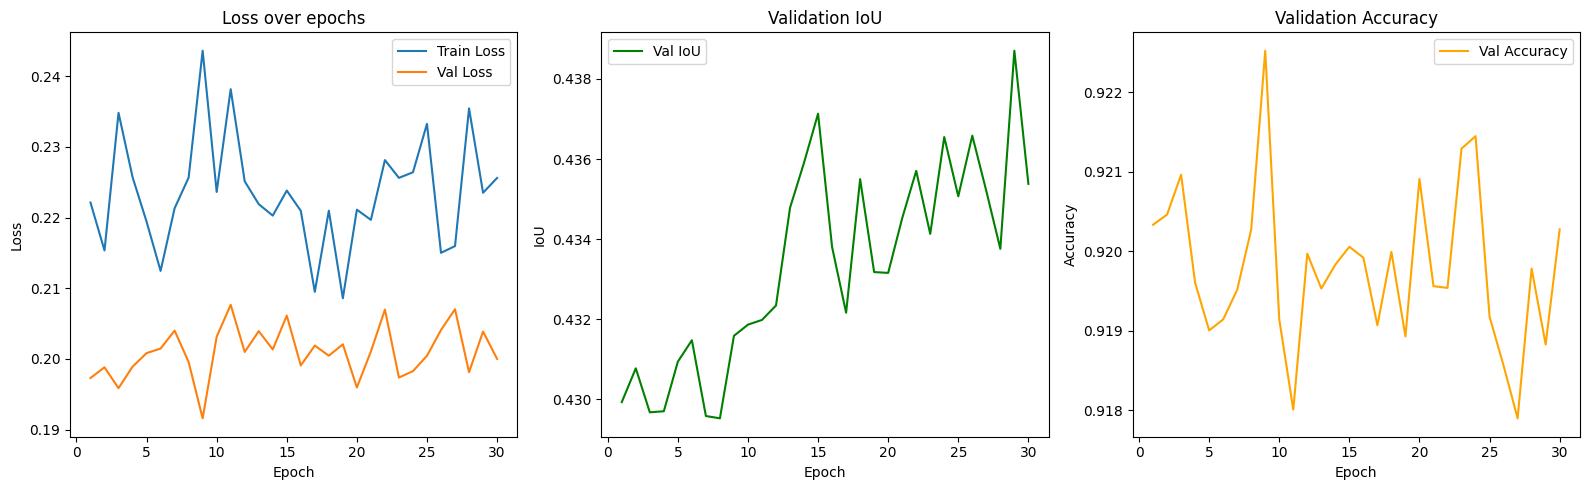

In [157]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, val_ious, label='Val IoU', color='green')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Validation IoU')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, val_accs, label='Val Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


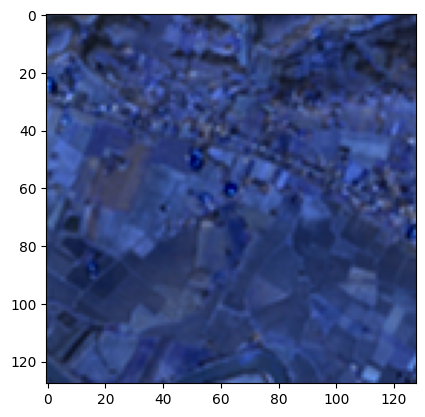

In [161]:
img = images[i][:3]
img = (img - img.min()) / (img.max() - img.min())  # normalize to [0,1]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)


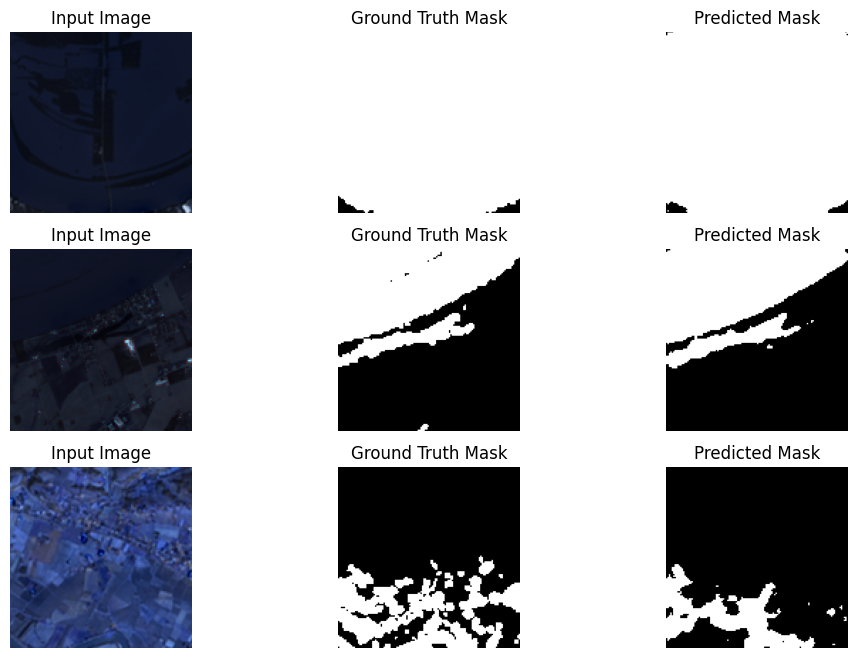

In [162]:
plt.figure(figsize=(12, 8))
for i in range(min(3, images.shape[0])):
    plt.subplot(3, 3, i*3 + 1)
    img = images[i][:3]
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(3, 3, i*3 + 2)
    plt.imshow(masks[i][0], cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(3, 3, i*3 + 3)
    plt.imshow(preds[i][0], cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.show()
